# Linear Regression using TENSORFLOW

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Create Data
x_data = np.linspace(0.0,10.0,num=1000000)

In [3]:
noise = np.random.rand(len(x_data))

In [4]:
#Create Y label
y_true = (0.5 * x_data) + 5 + noise

In [5]:
#Create Dataframes for Train data
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns = ['Y DATA'])

In [6]:
my_data = pd.concat([x_df,y_df],axis=1)

In [7]:
my_data.head()

,X Data,Y DATA
0,0.00000,5.405146
1,0.00001,5.030102
2,0.00002,5.266163
3,0.00003,5.119248
4,0.00004,5.496483


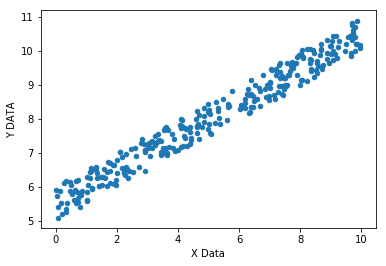

In [8]:
#Plot the Data
my_data.sample(n=300).plot(kind='scatter',x='X Data',y = 'Y DATA')

In [9]:
#Create varibales and Placeholders for model expression
batch_size = 10
m = tf.Variable(2.5)
b = tf.Variable(2.0)
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [10]:
#Model Expression
y_model=m*xph+b

In [11]:
#Calculate Error
error = tf.reduce_sum(tf.square(yph-y_model))

In [12]:
#Optimize model on the basis of calculate error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(error)

In [13]:
#Initialize all the Variables
init = tf.global_variables_initializer()

In [ ]:
#Run the session
with tf.Session() as sess:
    sess.run(init)
    batches = 50000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
        if i % 100 == 0:
            print("Epoch = {} , error = {}".format(i,sess.run(error,feed_dict = feed)))
    model_m,model_b=sess.run([m,b])

In [15]:
model_m

0.5006632

In [16]:
model_b

5.5011067

In [17]:
#Predicting values for test data
x1,x2 = 1 ,10
y1 = model_m*x1 + model_b
y2 = model_m*x2 + model_b

In [18]:
#Predicted Y_hat value
y_hat = x_data*model_m + model_b

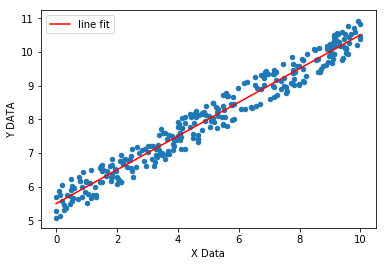

In [19]:
my_data.sample(n=300).plot(kind='scatter',x='X Data',y = 'Y DATA')
plt.plot(x_data,y_hat,'r',label = 'line fit')
plt.legend(loc='upper left')

# TF Linear Regressor

In [20]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [21]:
#Using Tensor LinearRegressor API
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sonetta\\AppData\\Local\\Temp\\tmp7e1e6t34', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000010B11BE0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
#Spliiting the the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.30, random_state=42)

In [23]:
#Train - Test data of 70-30% ratio
print(X_train.shape)
print(X_test.shape)

(700000,)
(300000,)


In [24]:
#Input function for Train data
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=10,num_epochs=1000,shuffle=False)

In [25]:
#input function for Test data
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_test},y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [ ]:
#Training Model for 10 epochs with 10000 training steps
estimator.train(input_fn=train_input_func,steps=10000)

In [27]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-21-10:44:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sonetta\AppData\Local\Temp\tmp7e1e6t34\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-21-10:44:32
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.08228482, global_step = 10000, label/mean = 7.990095, loss = 0.82284826, prediction/mean = 7.980886
INFO:tensorflow:Saving 'checkpoin

In [28]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-21-10:44:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sonetta\AppData\Local\Temp\tmp7e1e6t34\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-21-10:44:35
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.085547715, global_step = 10000, label/mean = 7.994159, loss = 0.85547715, prediction/mean = 7.982525
INFO:tensorflow:Saving 'checkpoi

In [29]:
print(train_metrics)

{'average_loss': 0.08228482, 'label/mean': 7.990095, 'loss': 0.82284826, 'prediction/mean': 7.980886, 'global_step': 10000}


In [30]:
print(test_metrics)

{'average_loss': 0.085547715, 'label/mean': 7.994159, 'loss': 0.85547715, 'prediction/mean': 7.982525, 'global_step': 10000}


In [31]:
#New data for predictions
brand_new_data = np.linspace(0,10,10)
brand_new_data

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [32]:
#Creating input function for new data
input_func_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [33]:
#Prdicting new values
predictions = []

for pred in estimator.predict(input_fn=input_func_predict):
    predictions.append(pred['predictions'])
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sonetta\AppData\Local\Temp\tmp7e1e6t34\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([5.4946413], dtype=float32),
 array([6.049046], dtype=float32),
 array([6.603451], dtype=float32),
 array([7.157856], dtype=float32),
 array([7.7122607], dtype=float32),
 array([8.266665], dtype=float32),
 array([8.82107], dtype=float32),
 array([9.375475], dtype=float32),
 array([9.92988], dtype=float32),
 array([10.484285], dtype=float32)]

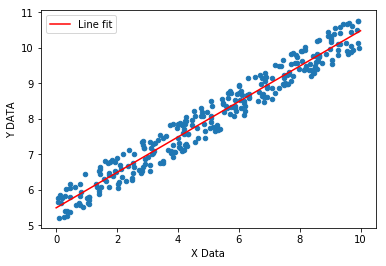

In [34]:
#Best fit
my_data.sample(n=300).plot(kind='scatter',x='X Data',y = 'Y DATA')
plt.plot(brand_new_data,predictions,'r',label='Line fit')
plt.legend(loc='upper left')